# IA Assignment Nº 2 - Supervised Learning
### Bank Account Fraud Dataset Suit

- The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!


In [1]:
# Main imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%config InteractiveShell.ast_node_interactivity='all'
%matplotlib inline

In [3]:
# Load the base dataset
base = pd.read_csv('data/Base.csv')

# Check the base dataset
base.head(10)
base.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,...,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,...,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,...,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,...,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,...,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


### Meaning of the columns:
- **income** (numeric): Annual income of the applicant (in decile form). Ranges between
[0.1, 0.9].
- **name_email_similarity** (numeric): Metric of similarity between email and applicant’s
name. Higher values represent higher similarity. Ranges between [0, 1].
- **prev_address_months_count** (numeric): Number of months in previous registered
address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges
between [−1, 380] months (-1 is a missing value).
- **current_address_months_count** (numeric): Months in currently registered address of
the applicant. Ranges between [−1, 429] months (-1 is a missing value).
- **customer_age** (numeric): Applicant’s age in years, rounded to the decade. Ranges
between [10, 90] years.
- **days_since_request** (numeric): Number of days passed since application was done.
Ranges between [0, 79] days.
- **intended_balcon_amount** (numeric): Initial transferred amount for application.
Ranges between [−16, 114].
- **payment_type** (categorical): Credit payment plan type. 5 possible (annonymized)
values.
- **zip_count_4w** (numeric): Number of applications within same zip code in last 4 weeks.
Ranges between [1, 6830].
- **velocity_6h** (numeric): Velocity of total applications made in last 6 hours i.e., average
number of applications per hour in the last 6 hours. Ranges between [−175, 16818].
- **velocity_24h** (numeric): Velocity of total applications made in last 24 hours i.e., average
number of applications per hour in the last 24 hours. Ranges between [1297, 9586]
- **velocity_4w** (numeric): Velocity of total applications made in last 4 weeks, i.e., average
number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].
- **bank_branch_count_8w** (numeric): Number of total applications in the selected bank
branch in last 8 weeks. Ranges between [0, 2404].
- **date_of_birth_distinct_emails_4w** (numeric): Number of emails for applicants with
same date of birth in last 4 weeks. Ranges between [0, 39].
- **employment_status** (categorical): Employment status of the applicant. 7 possible
(annonymized) values.
- **credit_risk_score** (numeric): Internal score of application risk. Ranges between
[−191, 389].
- **email_is_free** (binary): Domain of application email (either free or paid).
- **housing_status** (categorical): Current residential status for applicant. 7 possible
(annonymized) values.
- **phone_home_valid** (binary): Validity of provided home phone.
- **phone_mobile_valid** (binary): Validity of provided mobile phone.
- **bank_months_count** (numeric): How old is previous account (if held) in months.
Ranges between [−1, 32] months (-1 is a missing value).
- **has_other_cards** (binary): If applicant has other cards from the same banking company.


### Missing Values

According to the authors of the dataset, there isn't any missing information from individual instances. However, there are some missing values in some columns, which are purposely represented by -1.

In [4]:
#sb.pairplot(base, hue='payment_type')

## Correction of variables

Em primeiro lugar, é necessário corrigir as variáveis que estão com valores negativos, pois não faz sentido existir variáveis negativas, tendo em conta o contexto do problema. Por exemplo, não faz sentido o valor da velocidade de aplicações ou o credit risk score ser negativo. 
Com isto em conta, iremos eliminar os valores negativos nas seguintes colunas: "intended_balcon_amount", "velocity_6h" e "credit_risk_score".


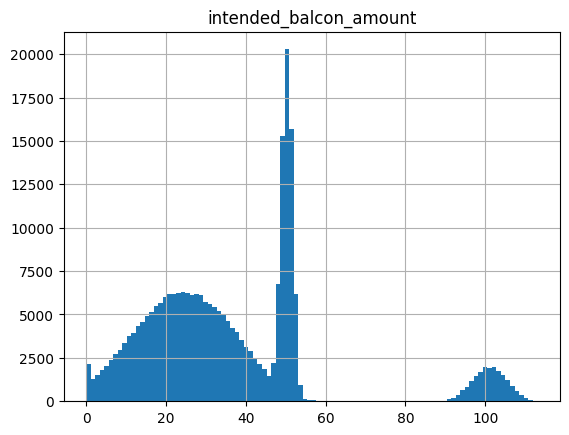

In [4]:
base_filtered = base[base['intended_balcon_amount'] >= 0]
hist = base_filtered.hist(column='intended_balcon_amount', bins=100)

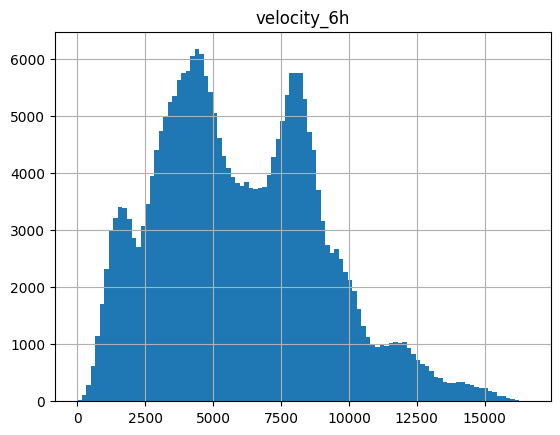

In [5]:
base_filtered = base_filtered[base_filtered['velocity_6h'] >= 0]
hist = base_filtered.hist(column='velocity_6h', bins=100)

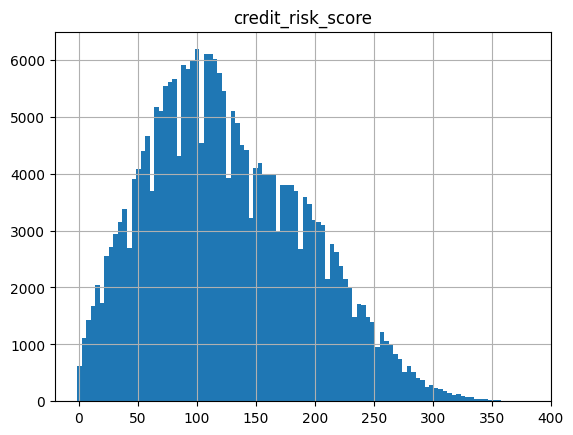

In [9]:
base_filtered = base_filtered[(base_filtered['credit_risk_score'] > 0) | (base_filtered['credit_risk_score'] == -1)]
hist = base_filtered.hist(column='credit_risk_score', bins=100)

Now, the data has already been filtered, although in the ##credit_risk_score## column there are still negative values. This is because this column has missing values that does not make sense to filter. On top of that, we were able to note that in the ##intended_balcon_amount## column there is an unordinary spike around the value of 50.